In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Подготовка данных

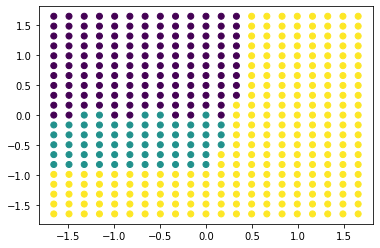

In [2]:
X1,X2 = np.meshgrid(np.arange(-10, 10.1, 1),np.arange(-10, 10.1, 1))
X=np.array([X1.flatten(),X2.flatten()]).T
y = [0]*X.shape[0]

from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_ = X_scale.fit_transform(X)

for i in range(X.shape[0]):
    if np.cos(1.7*X[i,0]) > X[i,1]:
        y[i] = 1
    if np.exp(X[i,0])-6 > X[i,1]:
        y[i]=2

plt.scatter(X_[:,0],X_[:,1],c=y)

def convert_y_to_vect(y, num_class=2):
    y_vect = np.zeros((len(y), num_class))
    for i in range(len(y)):
        y_vect[i, y[i]]=1
    return y_vect

y_vect = convert_y_to_vect(y, 3)

#### Класс нейронной сети

In [31]:
class NNet:
    
    def sigmoid(self, x, deriv=False):
        if deriv:
            return x*(1-x)
        return 1/(1+np.exp(-x))

    def tanh(self, x, deriv=False):
        if deriv:
            return 1 - x**2
        return np.tanh(x)
    
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size 
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.W = [] # Weights
        self.W += [np.random.rand(self.input_size+1,self.hidden_sizes[0])] # Input layer
        for i in range(1, len(self.hidden_sizes)): # Hidden layers
            self.W += [np.random.rand(self.hidden_sizes[i-1]+1,self.hidden_sizes[i])]
        self.W += [np.random.rand(self.hidden_sizes[len(self.hidden_sizes)-1]+1,self.output_size)] #Output layer

        
    def train(self, X, y, activation = 'sigmoid', epochs = 10000, eta = 1):
        if activation == 'sigmoid':
            self.activation = self.sigmoid
        if activation == 'tanh':
            self.activation = self.tanh
        
        self.bias = np.ones((len(X),1))
        for epoch in range(epochs):
            if epoch%100 == 0:
                print(f"Epoch №{0}",epoch)
            L = []
            Z = [X] #[Z0]
            delta = []
            # прямое распространение информации
            for i in range(len(self.W)):
                L += [np.append(Z[i], self.bias, axis=1)]
                Z += [self.activation(np.dot(L[i],self.W[i]))]
            L += [Z[len(Z)-1]]
            # обратное распространение ошибки  
            delta += [y - Z[len(Z)-1]] 
            for i in range(1, len(self.W)):
                delta += [(np.dot(delta[i-1]*self.activation(Z[len(Z)-i],True),self.W[len(self.W)-i].T))[:,:-1]]
    
            # обновление весов
            for i in range(len(self.W)):
                self.W[len(self.W)-1-i] += eta*np.dot(L[len(self.W)-1-i].T,delta[i]*self.activation(Z[len(self.W)-i],True))/(len(X))
    
    def predict(self, X):
        bias = np.ones((len(X),1))
        Z = X
        for i in range(len(self.W)):
            L = np.append(Z, bias, axis=1)
            Z = self.activation(np.dot(L,self.W[i]))
        L = Z
        return np.argmax(Z, axis=1)

#### Обучение

In [32]:
model = NNet(X_.shape[1], [8,10,7], 3)
model.train(X_, y_vect, activation = "tanh",epochs=10000, eta=1)

Epoch №0 0
Epoch №0 100
Epoch №0 200
Epoch №0 300
Epoch №0 400
Epoch №0 500
Epoch №0 600
Epoch №0 700
Epoch №0 800
Epoch №0 900
Epoch №0 1000
Epoch №0 1100
Epoch №0 1200
Epoch №0 1300
Epoch №0 1400
Epoch №0 1500
Epoch №0 1600
Epoch №0 1700
Epoch №0 1800
Epoch №0 1900
Epoch №0 2000
Epoch №0 2100
Epoch №0 2200
Epoch №0 2300
Epoch №0 2400
Epoch №0 2500
Epoch №0 2600
Epoch №0 2700
Epoch №0 2800
Epoch №0 2900
Epoch №0 3000
Epoch №0 3100
Epoch №0 3200
Epoch №0 3300
Epoch №0 3400
Epoch №0 3500
Epoch №0 3600
Epoch №0 3700
Epoch №0 3800
Epoch №0 3900
Epoch №0 4000
Epoch №0 4100
Epoch №0 4200
Epoch №0 4300
Epoch №0 4400
Epoch №0 4500
Epoch №0 4600
Epoch №0 4700
Epoch №0 4800
Epoch №0 4900
Epoch №0 5000
Epoch №0 5100
Epoch №0 5200
Epoch №0 5300
Epoch №0 5400
Epoch №0 5500
Epoch №0 5600
Epoch №0 5700
Epoch №0 5800
Epoch №0 5900
Epoch №0 6000
Epoch №0 6100
Epoch №0 6200
Epoch №0 6300
Epoch №0 6400
Epoch №0 6500
Epoch №0 6600
Epoch №0 6700
Epoch №0 6800
Epoch №0 6900
Epoch №0 7000
Epoch №0 7100
Epoc

#### Предсказание

In [33]:
X1,X2 = np.meshgrid(np.arange(-10, 10.1, 0.5),np.arange(-10, 10.1, 0.5))
X_test=np.array([X1.flatten(),X2.flatten()]).T

from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_test_scaled = X_scale.fit_transform(X_test)

pred = model.predict(X_test_scaled)

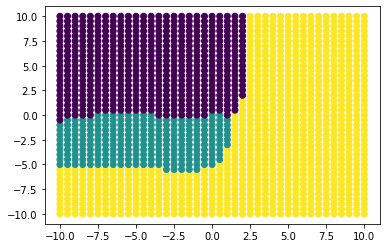

In [34]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred)